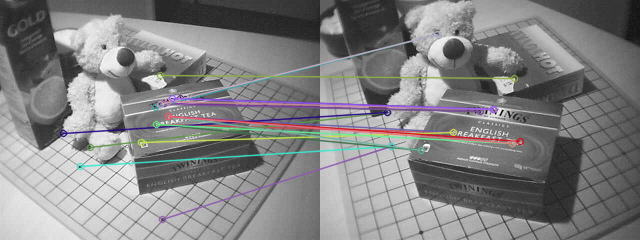

In [ ]:
from IPython.core.macro import Macro
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow


def find_features(img, nfeatures_limit=500):
    # default values except for threshold - discard points that have 0 response
    detector = cv.FastFeatureDetector_create(threshold=1, nonmaxSuppression=True,
                                             type=cv.FAST_FEATURE_DETECTOR_TYPE_9_16)
    # default values
    descriptor = cv.xfeatures2d.DAISY_create(radius=4, q_radius=3, q_theta=8, q_hist=6,
                                             norm=cv.xfeatures2d.DAISY_NRM_NONE,
                                             interpolation=True, use_orientation=False)
    
    kp = detector.detect(img)
    kp = sorted(kp, key=lambda x: x.response, reverse=True)[:nfeatures_limit]
    kp, des = descriptor.compute(img, kp)

    if kp is None or len(kp) < 3:
        return [], []
    if des is None or len(des) < 3:
        return [], []
    return kp, des


def match_features(img1_kp_des, img2_kp_des, nfeatures_limit=20):
    kp1, des1 = img1_kp_des
    kp2, des2 = img2_kp_des
    
    matches = []
    for i, k1 in enumerate(des1):
          for j, k2 in enumerate(des2):
              matches.append(cv.DMatch(_queryIdx=i, _trainIdx=j, _distance=np.linalg.norm(k1 - k2, ord=2)))
    matches = sorted(matches, key=lambda x: x.distance)

    return matches




CUSTOM BF:


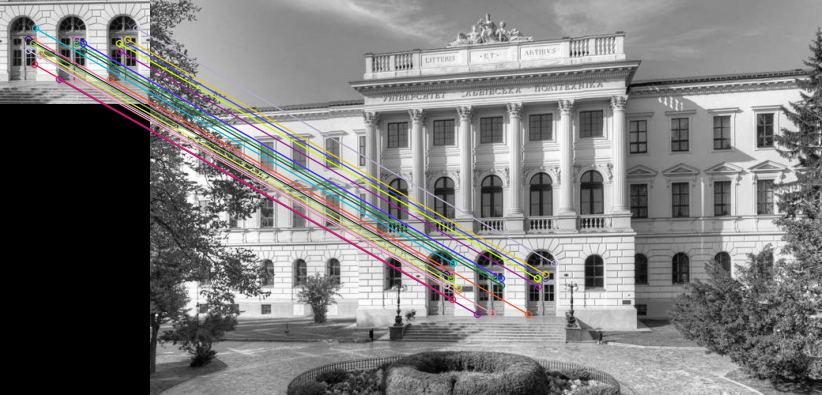

ORIGINAL BF:


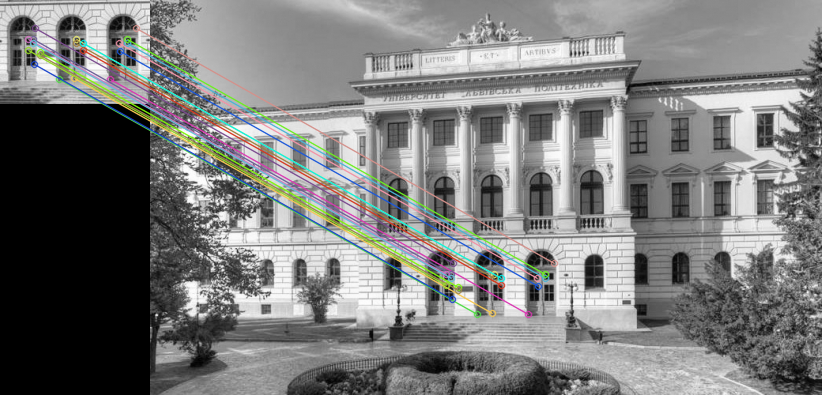

In [ ]:
PATH = '/content/drive/MyDrive/img/'
IMGS = ['im2.png', 'im1.png', 'im3.jpeg', 'im4.jpg']

test1 =  {
    'img1': cv.cvtColor(cv.imread(PATH + IMGS[0]), cv.COLOR_BGR2GRAY),
    'img2': cv.cvtColor(cv.imread(PATH + IMGS[1]), cv.COLOR_BGR2GRAY),
    'MAX_FEATURES_FIND': 20,
    'FEATURES_SHOW': 20
    }
test2 = {
'img1': cv.cvtColor(cv.imread(PATH + IMGS[2]), cv.COLOR_BGR2GRAY),
'img2': cv.cvtColor(cv.imread(PATH + IMGS[3]), cv.COLOR_BGR2GRAY),
'MAX_FEATURES_FIND': 500,
'FEATURES_SHOW': 20 
}





test = test2

im1 = test['img1']
im2 = test['img2']


MAX_FEATURES_FIND = test['MAX_FEATURES_FIND']
FEATURES_SHOW = test['FEATURES_SHOW']

origin_img_features = find_features(im1, nfeatures_limit=MAX_FEATURES_FIND)
matching_img_features = find_features(im2, nfeatures_limit=MAX_FEATURES_FIND)


matches = match_features(matching_img_features, origin_img_features)

kp1, des1 = origin_img_features
kp2, des2 = matching_img_features

res = cv.drawMatches(im2, kp2, im1, kp1, matches[:FEATURES_SHOW], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

print('CUSTOM BF:')

cv2_imshow(res)

print('ORIGINAL BF:')

bf = cv.BFMatcher(cv.NORM_L2)

matches = bf.match(des2,des1)

matches = sorted(matches, key = lambda x:x.distance)

res = cv.drawMatches(im2,kp2,im1,kp1,matches[:FEATURES_SHOW],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(res)


